In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
import time
import math
import cv2
import glob

In [2]:
#constants 
scalar_timesteps_file=[r'./zslices.multifield/multifield.0009.zslice.txt',r'./zslices.multifield/multifield.0019.zslice.txt',
                      r'./zslices.multifield/multifield.0029.zslice.txt',r'./zslices.multifield/multifield.0039.zslice.txt',
                      r'./zslices.multifield/multifield.0049.zslice.txt',r'./zslices.multifield/multifield.0059.zslice.txt',
                      r'./zslices.multifield/multifield.0069.zslice.txt',r'./zslices.multifield/multifield.0079.zslice.txt',
                      r'./zslices.multifield/multifield.0089.zslice.txt',r'./zslices.multifield/multifield.0099.zslice.txt']

scalar_fields = { 0:'total particle density',1:'gas temperature',2:'H mass abundance',3:'H+ mass abundance'}
labels ={0:'particles/cm^3 ',1:'degrees Kelvin',2:'fraction of total mass',3:'fraction of total mass'}
X = np.arange(600)
Y = np.arange(248)
Z = np.arange(248)

In [3]:
levels=[]
min_value = math.inf
max_value = -math.inf
def level_mapper(num_field):
    global min_value,max_value,levels
    levels=[]
    min_value = math.inf
    max_value = -math.inf
    for time in range(len(scalar_timesteps_file)):
        df = pd.read_csv(scalar_timesteps_file[time], sep=" ", header=None)
        values = np.array(df.iloc[:,num_field]).reshape(248,600)
        min_value= min(min_value,np.min(values))
        max_value= max(max_value,np.max(values))
    step= (max_value-min_value)/5
    for i in range(5):
        levels.append(min_value+i*step)
    

In [4]:
def scalar_plots_c(timestep,num_field):
    df = pd.read_csv(scalar_timesteps_file[timestep], sep=" ", header=None)
    values = np.array(df.iloc[:,num_field]).reshape(248,600)
    fig = plt.figure(figsize=(10,5))
    plt.xlabel("X-axis") 
    plt.ylabel("Y-axis")
    plt.title("{}".format(scalar_fields[num_field]))
    pc = plt.contourf(X,Y,values,levels,cmap = cm.GnBu)
    plt.clabel(pc, fmt='%d')
    plt.colorbar(label=labels[num_field])
    return pc,

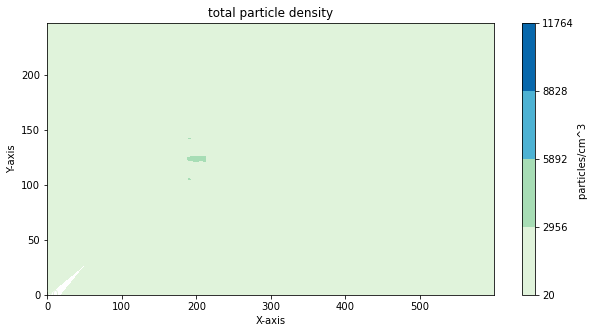

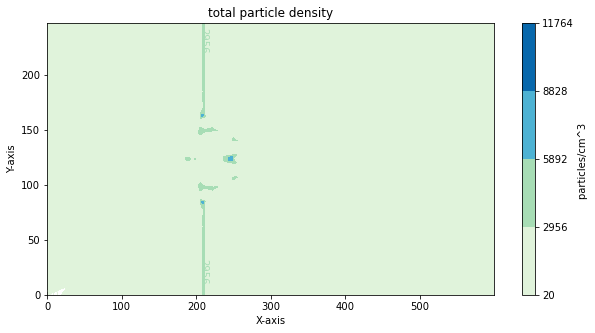

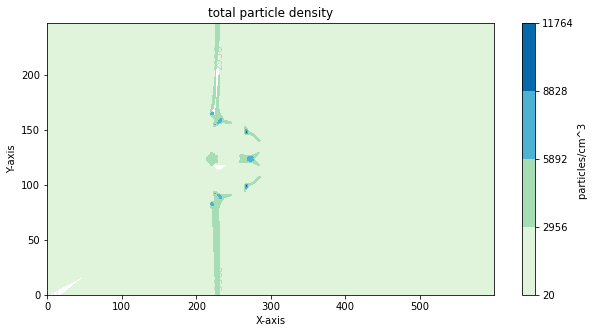

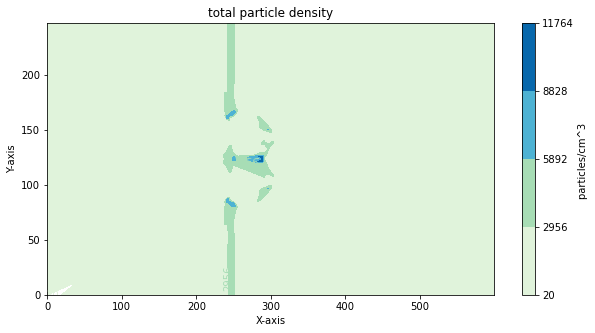

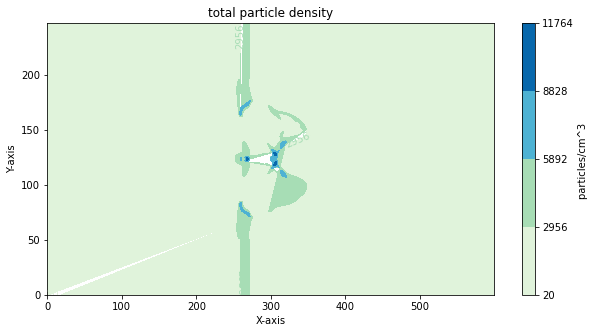

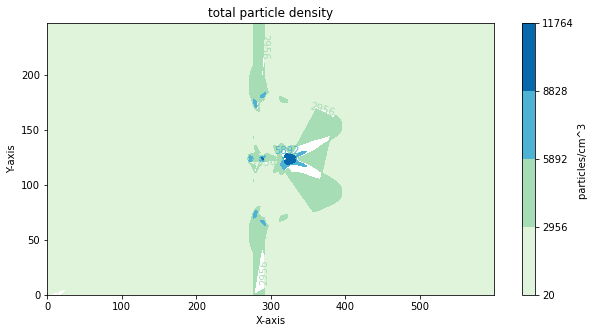

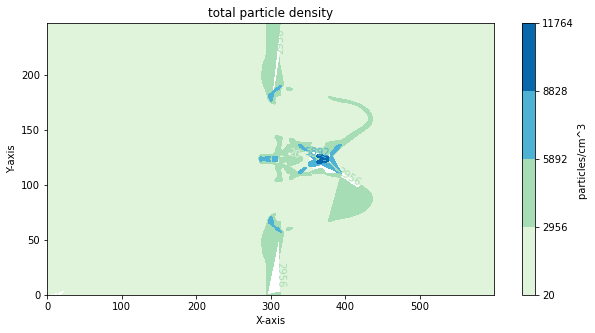

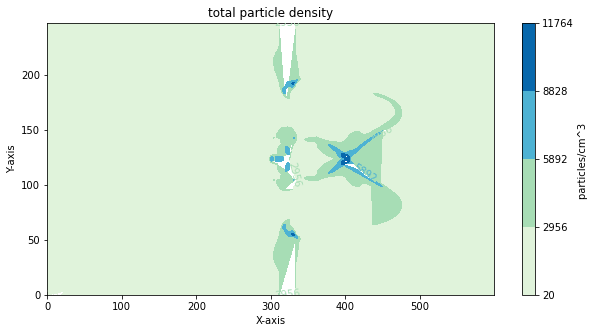

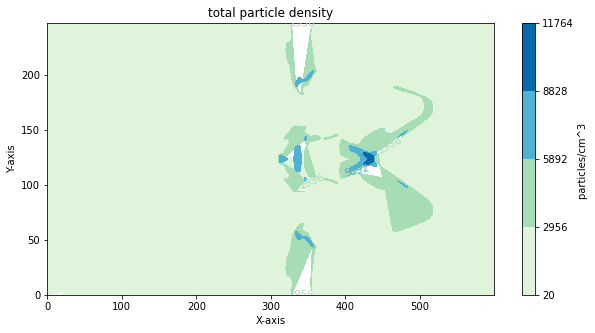

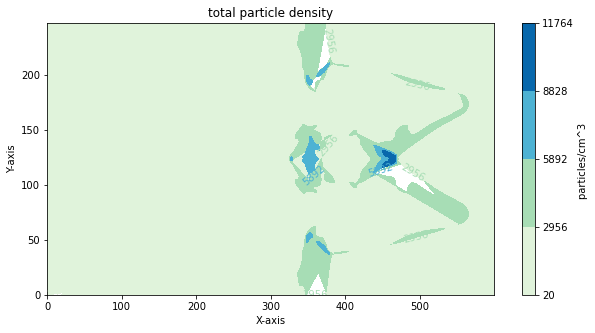

In [5]:
#density contour plot
level_mapper(0)
for time in range(len(scalar_timesteps_file)):
    scalar_plots_c(time,0)
    plt.savefig('{}.jpg'.format(scalar_fields[0]+str(time)))

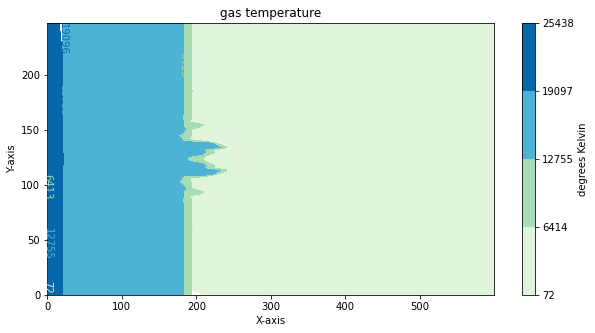

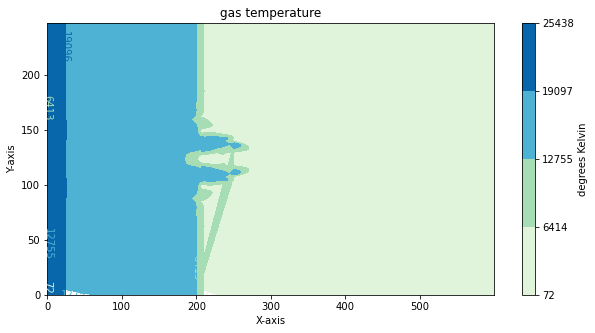

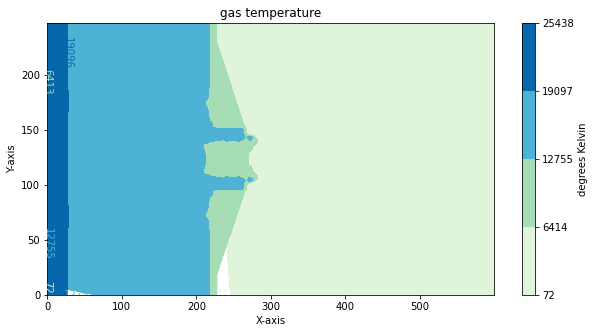

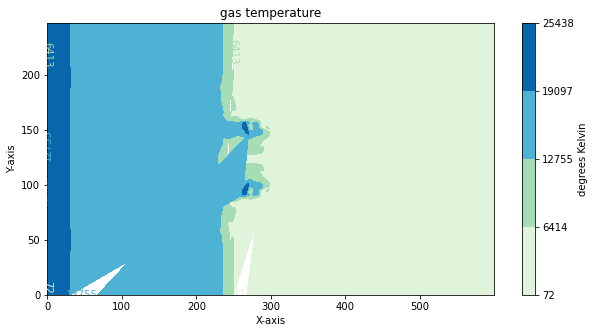

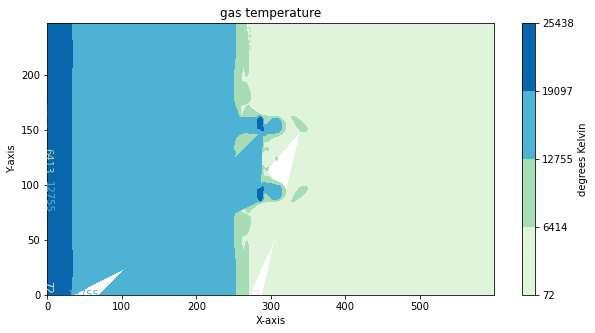

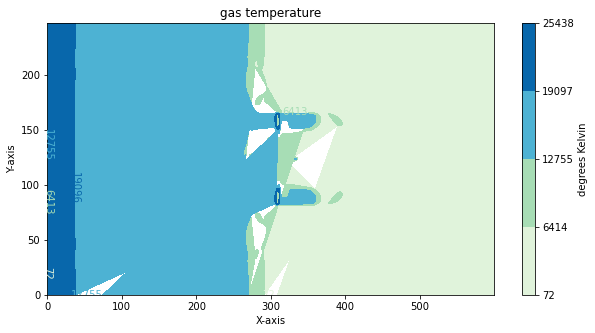

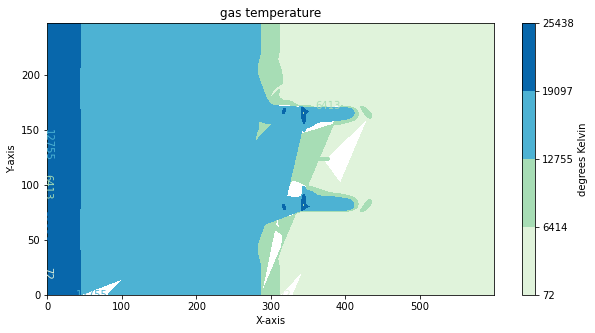

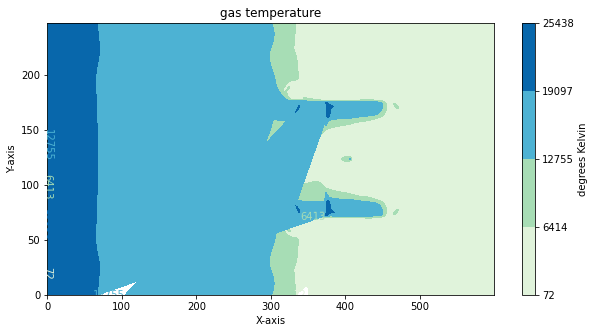

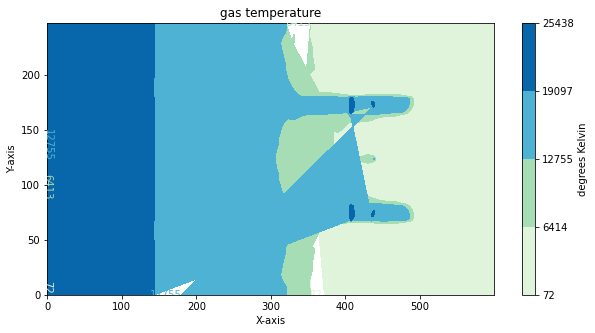

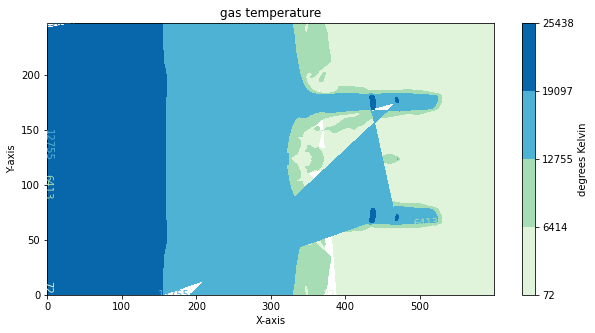

In [6]:
#temperature contour plot
level_mapper(1)
for time in range(len(scalar_timesteps_file)):
    scalar_plots_c(time,1)
    plt.savefig('{}.jpg'.format(scalar_fields[1]+str(time)))

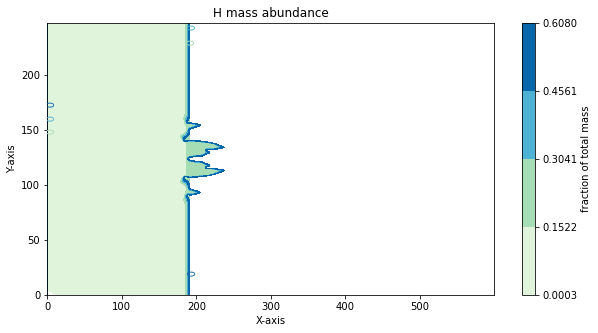

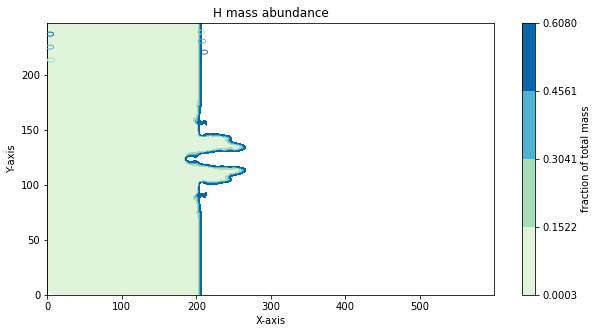

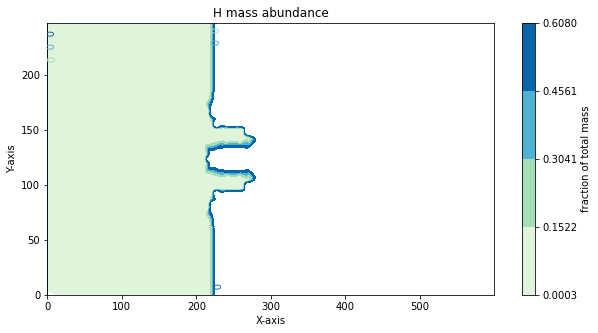

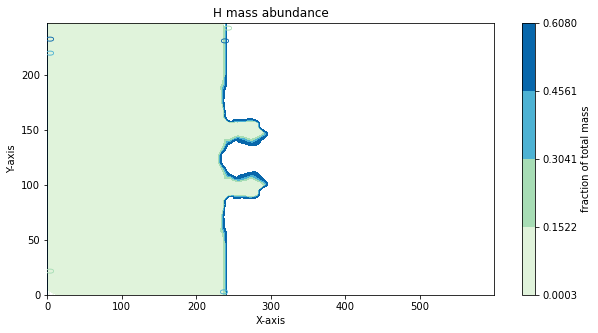

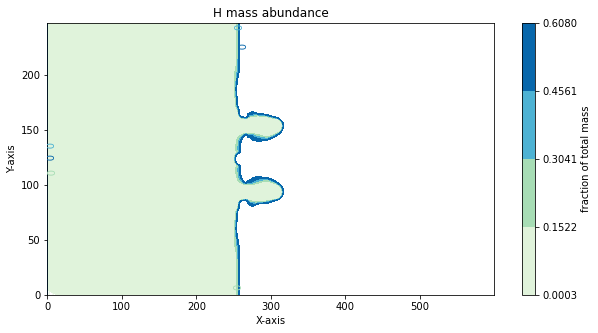

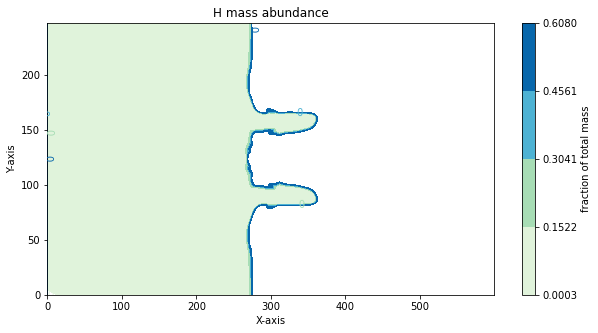

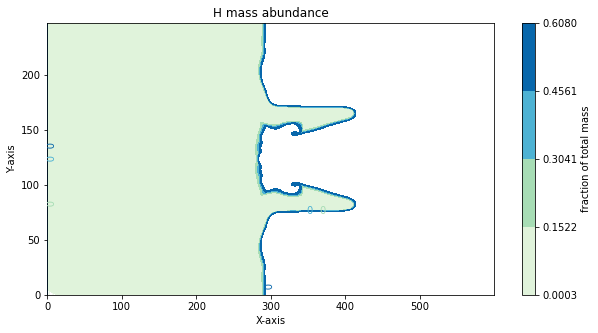

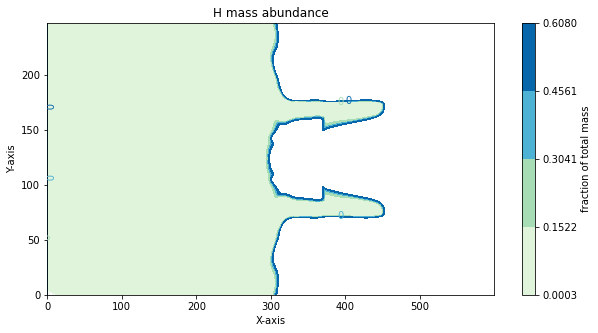

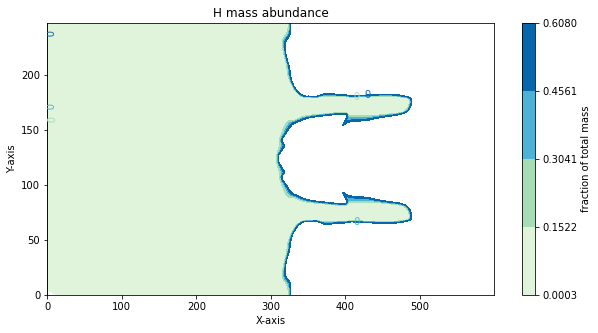

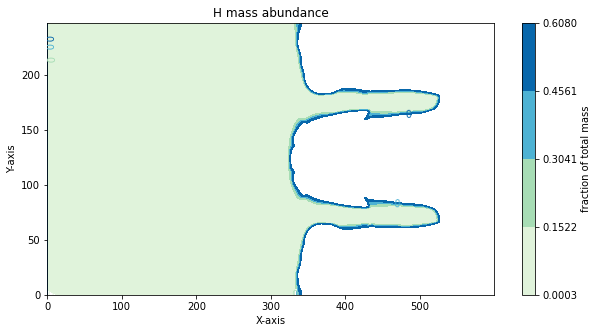

In [7]:
#H mass abundance contour plot
level_mapper(2)
for time in range(len(scalar_timesteps_file)):
    scalar_plots_c(time,2)
    plt.savefig('{}.jpg'.format(scalar_fields[2]+str(time)))

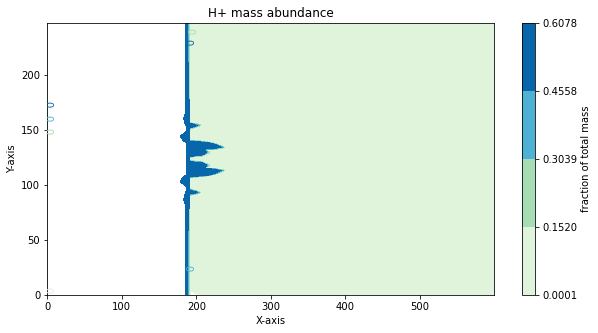

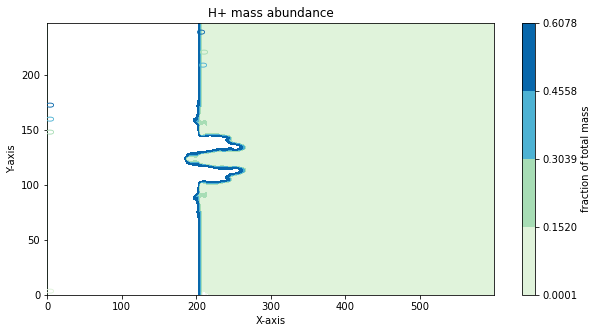

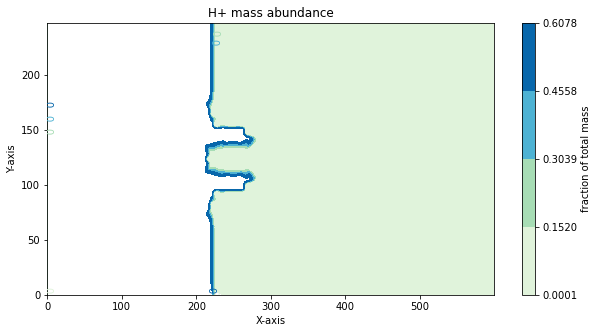

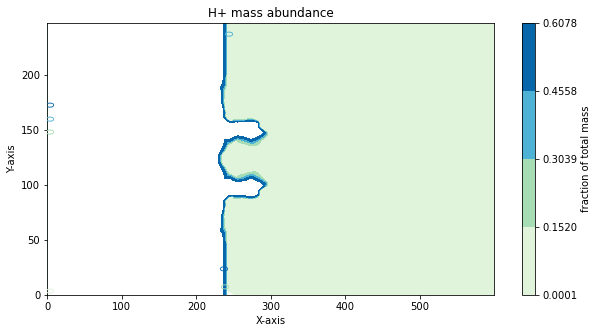

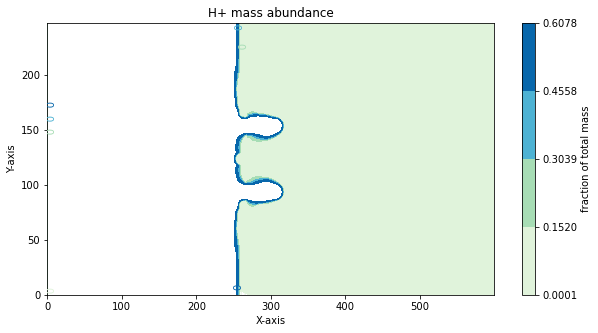

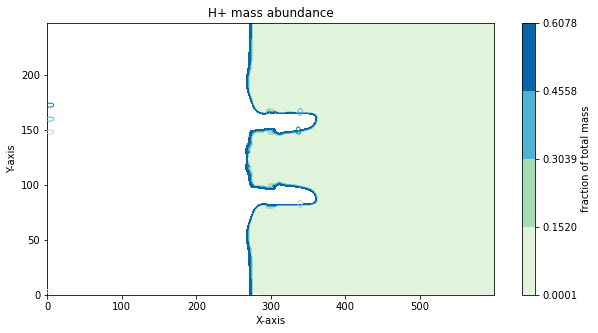

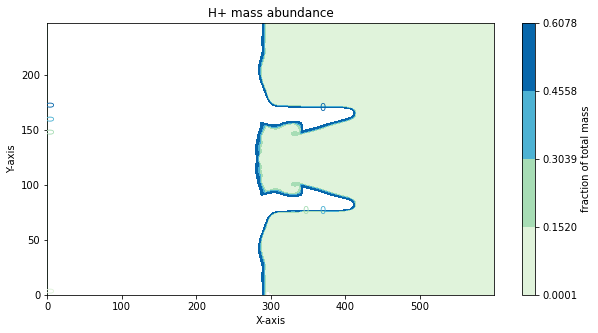

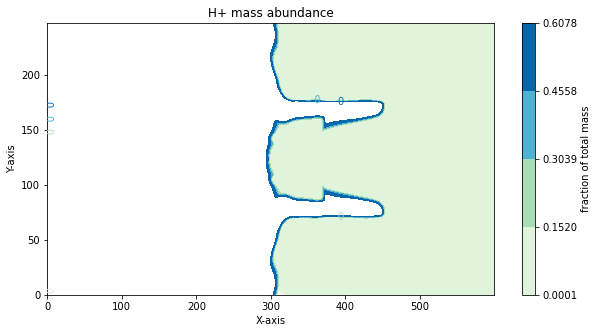

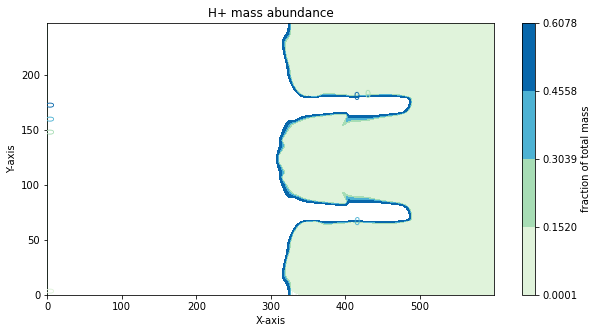

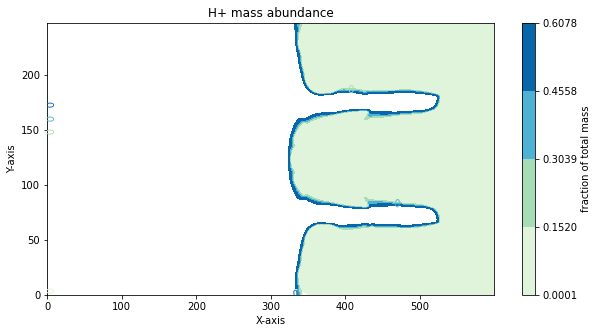

In [8]:
#H+ mass abundance contour plot
level_mapper(3)
for time in range(len(scalar_timesteps_file)):
    scalar_plots_c(time,3)
    plt.savefig('{}.jpg'.format(scalar_fields[3]+str(time)))

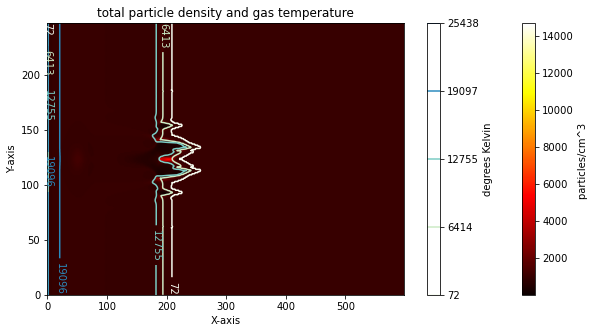

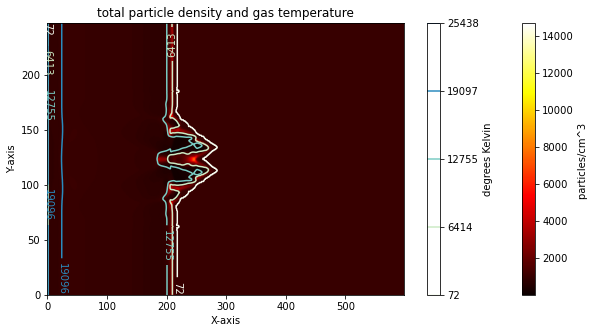

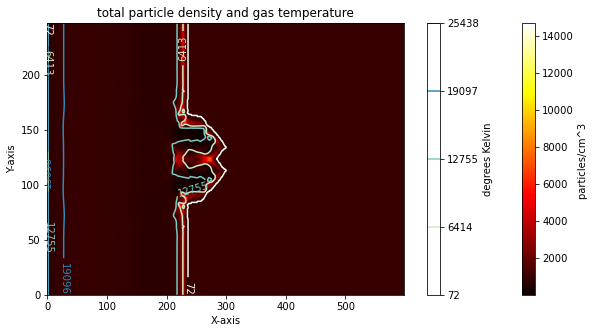

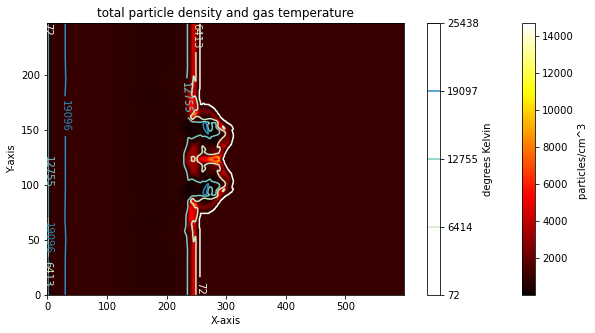

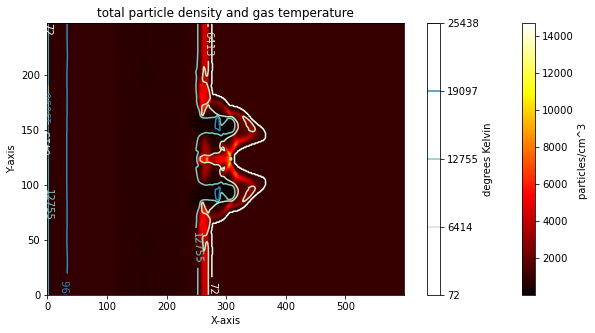

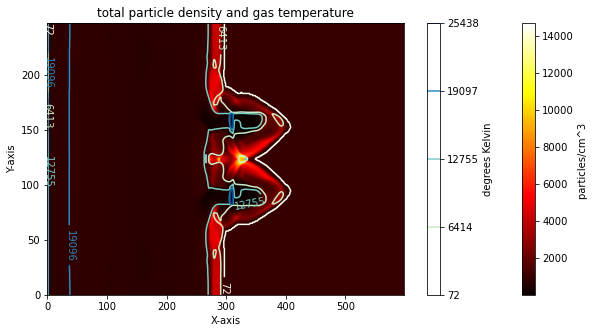

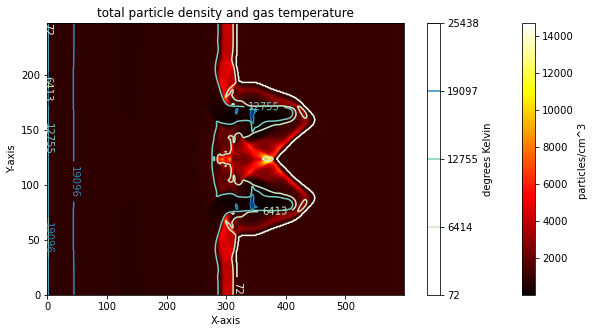

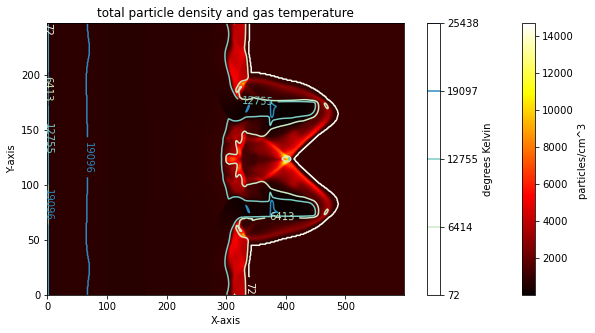

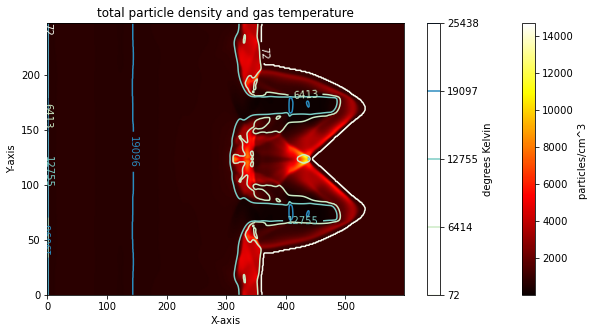

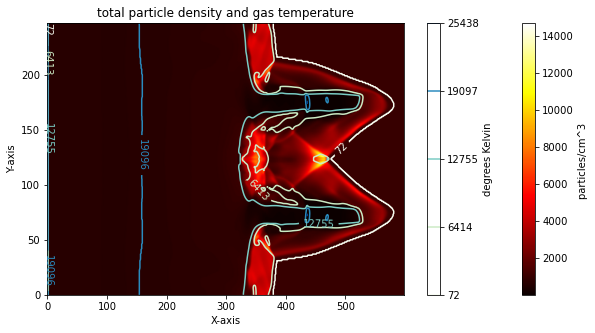

In [9]:
#experiment with two visualizations 
def scalar_plots_cmap(timestep,num_field1,num_field2):
    df = pd.read_csv(scalar_timesteps_file[timestep], sep=" ", header=None)
    values = np.array(df.iloc[:,num_field1]).reshape(248,600)
    fig = plt.figure(figsize=(10,5))
    plt.xlabel("X-axis") 
    plt.ylabel("Y-axis")
    plt.title("{} and {}".format(scalar_fields[num_field1],scalar_fields[num_field2]))
    level_mapper(num_field1)
    pc = plt.pcolormesh(X,Y,values,vmin=min_value,vmax=max_value,shading='gouraud', cmap = cm.hot)
    plt.colorbar(label=labels[num_field1])
    level_mapper(num_field2)
    values = np.array(df.iloc[:,num_field2]).reshape(248,600)
    pc = plt.contour(X,Y,values,levels,cmap = cm.GnBu)
    plt.colorbar(label=labels[num_field2])
    plt.clabel(pc, fmt='%d')   
    return pc,

#density and temperature contour-color map plot
for time in range(len(scalar_timesteps_file)):
    scalar_plots_cmap(time,0,1)
    plt.savefig('contour_color_{}.jpg'.format(scalar_fields[0]+scalar_fields[1]+str(time)))
    plt.show()

In [9]:
frameSize = (1000,500)
fourcc = cv2.VideoWriter_fourcc(*'H264')
out = cv2.VideoWriter('contour_map.mp4',fourcc,2.0, frameSize)

for filename in glob.glob('./*.jpg'):
    img = cv2.imread(filename)
    out.write(img)

out.release()

In [10]:
from IPython.display import HTML
HTML("""
<video width="800" height="500" controls>
  <source src="./contour_map.mp4" type="video/mp4">
</video>
""")